In [1]:
import os
import sys
import argparse
sys.path.append("..")
sys.path.append("../..")
sys.path.append("../../..")
from lib.logging import print_msg
from lib.read_data import data_read

def load_data(path):
    print(path)
    data = {}
    for pkl_name in sorted(os.listdir(path)):
        if ".pkl" in pkl_name:
            print(pkl_name)
            data[int(pkl_name.split(".pkl")[0])] = data_read(path, pkl_name)
    return data

result_path = "../../workload_manage/five_workloads_3/result"

data = {}

for workload_name in sorted(os.listdir(result_path)):
    print(workload_name)
    if workload_name.startswith("workload"):
        data[workload_name] = {}


#         for run_name in ["bf", "gd"]:
        for run_name in ["gd"]:
            if run_name == "gd":
                result_search_path_temp = os.path.join(result_path, workload_name, run_name)
                for timeout_name in sorted(os.listdir(result_search_path_temp)):
                    if "_" in timeout_name and timeout_name == "5_5":
                        result_search_path = os.path.join(result_search_path_temp, timeout_name)
                        data[workload_name][f"gd_{timeout_name}"] = load_data(result_search_path)
            else:
                result_search_path = os.path.join(result_path, workload_name, run_name)
                data[workload_name][run_name] = load_data(result_search_path)

workload_1
../../workload_manage/five_workloads_3/result/workload_1/gd/5_5
10.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/gd/5_5 10.pkl
[success]
12.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/gd/5_5 12.pkl
[success]
14.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/gd/5_5 14.pkl
[success]
16.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/gd/5_5 16.pkl
[success]
18.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/gd/5_5 18.pkl
[success]
2.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/gd/5_5 2.pkl
[success]
20.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/gd/5_5 20.pkl
[success]
22.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/gd/5_5 22.pkl
[success]
24.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/gd/5_5 24.pkl
[success]
4.pkl
[lo

gd_5_5
5.897857899855842 25.28458536329257
6.742639614938295 39.512783296514705
3.430531478217912 27.41385507383926
2.8823327831184 20.63840738594917
./hashcall_reduction.pdf


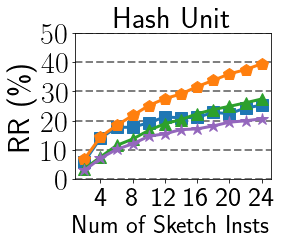

gd_5_5
7.777777259259366 29.17281831531756
8.622262207296693 44.79707471843588
4.339796572054228 34.00629938533999
3.8010321223141843 26.611337273688225
./salu_reduction.pdf


<Figure size 432x288 with 0 Axes>

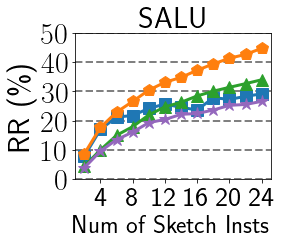

gd_5_5
-0.1471336382747682 0.03020234702678905
0.18837707991655528 7.326953166390042
0.06266971166819767 2.3734124180504237
0.009629735291372794 0.4239854533609872
./sram_reduction.pdf


<Figure size 432x288 with 0 Axes>

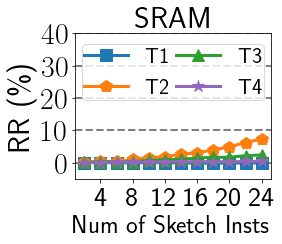

<Figure size 432x288 with 0 Axes>

In [2]:
def get_reduction_rate(baseline, opt):
    return (baseline - opt)/(baseline+0.000001) * 100

from statistics import median

import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['hatch.linewidth'] = 0.1
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
width = 0.1

markerst1 = 's'
markerst2 = 'p'
markerst3 = '^'
markerst4 = '*'
markerst5 = '|'


for resource in ["hashcall", "salu", "sram"]:
    fig, ax = plt.subplots(figsize=(4, 3.5))
    for run_name in ["gd_5_5"]:
#     for run_name in ["gd_0_0"]:
        print(run_name)
        for workload in ["workload_1", "workload_2", "workload_3", "workload_4", "workload_5"]:
        # for workload in ["workload_2", "workload_1", "workload_4", "workload_5"]:
            # print(workload)
            key_list = sorted(data[workload][run_name].keys())
#             print(key_list)
            key_list = [i for i in range(2, 25, 2)]
            plot_data = []
            actual_key_list = []
            min_list = []
            max_list = []

#             before_list = {}
#             after_list = {}
#             ratio_list = {}
#             before_list[resource] = []
#             after_list[resource] = []
#             ratio_list[resource] = []

            for key in key_list:
                df = data[workload][run_name][key]["mean_df"]

                ratio = get_reduction_rate(df["before"], df["after"])
#                 before_list[resource].append(df["before"][resource])
#                 after_list[resource].append(df["after"][resource])
#                 if resource == "sram":
#                     plot_data.append(-ratio[resource])
#                 else:
                plot_data.append(ratio[resource])

                actual_key_list.append(key)
#                 plot_data.append(median(list_data))
#                 max_list.append(max(list_data) - median(list_data))
#                 min_list.append(median(list_data) - min(list_data))
#                 print(key, len(list_data), min(list_data), median(list_data), max(list_data))
            marker = "o"
            if workload == "workload_1":
                workload_name = "T1"
#                 workload_name = "T1. Sketch"
                color="C0"
                marker = markerst1
            if workload == "workload_2":
                workload_name = "T2"
#                 workload_name = "T2. FKey"

                color="C1"
                marker = markerst2
            if workload == "workload_3":
                workload_name = "T3"
#                 workload_name = "T3. FSize"
                color="C2"
                marker = markerst3
                continue
            if workload == "workload_4":
                workload_name = "T3"
                color="C2"
                marker = markerst3
            if workload == "workload_5":
                workload_name = "T4"
#                 workload_name = "T4. Random"
                color="C4"
                marker = markerst4

            label = workload_name
            ax.plot(actual_key_list, plot_data, label=label, color=color, marker=marker, linewidth=3, markersize=12)
            print(min(plot_data), max(plot_data))
            # ax.errorbar(actual_key_list, plot_data, label=label, color=color, marker=marker, yerr=[min_list, max_list])
            # ax.errorbar(actual_key_list, max_list, label=label, color=color)
            # print("avg", plot_data)
            # print("max", max_list)
            # break
        # break

#     key_list = [i*2 for i in range(1, 16)]

    ax.tick_params(axis='y', labelsize=30)
#     print(key_list)
#     new_x = [i for i in range(2, 21, 2)]
# #     new_x_label = [i for i in range(2, 21, 2)]
#     new_x_label = ['2', '4', '6', '8', '10', '12', '14', '16', '18', '20']
#     print(new_x)
#     print(new_x_label)
    new_x = [4, 8, 12, 16, 20, 24]
    new_x_label = [4, 8, 12, 16, 20, 24]
    # new_x = [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
    # new_x_label = [4, '', 8, '', 12, '', 16, '', 20, '', 24]

    ax.set_xticks(new_x)
    ax.set_xticklabels(new_x_label, fontsize=28)
#     plt.xticks(fontsize=25)



    #     key_list = ['2', '4', '6', '8', '10', '12', '14', '16', '18', '20']
#     key_list = ['2', '4', '6', '8', '10', '12', '14', '16', '18', '20']
#     ax.set_xticks(key_list)
#     ax.set_xticklabels([10, 20, 30], fontsize=20)
#     ax.set_xticklabels(fontsize=20)
#     ax.xaxis.label.set_size(20)
#     plt.xlabel('xlabel', fontsize=18)
    from matplotlib.ticker import MultipleLocator
    ax.yaxis.set_major_locator(MultipleLocator(10))

    if resource == "hashcall":
        ax.set_ylim([0, 50])
        ax.set_ylabel(f"RR (\\%)", fontsize=30)
        ax.set_title(f"Hash Unit", fontsize=30)
        filename = "hashcall_reduction.pdf"
        ax.set_xlabel('Num of Sketch Insts', fontsize=25)
#         plt.legend(loc="lower right", fontsize=13, ncol=3, columnspacing=1)
#         plt.legend(loc="upper left", fontsize=13, ncol=2, columnspacing=1)

    
    if resource == "salu":
        ax.set_ylim([0, 50])
        ax.set_ylabel(f"RR (\\%)", fontsize=30)
        ax.set_title(f"SALU", fontsize=30)
        # ax.set_ylabel(f"SALU (\\%)", fontsize=30)
        filename = "salu_reduction.pdf"
        ax.set_xlabel('Num of Sketch Insts', fontsize=25)

#         plt.legend(loc="lower right", fontsize=13, ncol=2, columnspacing=1)
#         plt.legend(loc="upper left", fontsize=13, ncol=2, columnspacing=1)


    if resource == "sram":
        ax.set_ylim([-5, 40])
        ax.set_ylabel(f"RR (\\%)", fontsize=30)
        ax.set_title(f"SRAM", fontsize=30)
        # ax.set_ylabel(f"SRAM (\\%)", fontsize=30)
        filename = "sram_reduction.pdf"
        ax.set_xlabel('Num of Sketch Insts', fontsize=25)
        ax.yaxis.set_major_locator(MultipleLocator(10))
#         plt.legend(loc="upper left", fontsize=13, ncol=2, columnspacing=1)
        plt.legend(loc="upper center", fontsize=22, ncol=2, columnspacing=0.3, borderpad=0.1)


#         plt.legend(loc="upper right", fontsize=13, ncol=3, columnspacing=1)


    # latex_path = "/Users/hnamkung/hun-latex/Hun-multi-dim-sketches/nsdi23/figures/6_evaluation"
    latex_path = "."
    import os
    full_path = os.path.join(latex_path, filename)
    # full_path = os.path.join(latex_path, filename.replace("pdf", "png"))

    print(full_path)
    plt.grid(color='gray', linestyle='--', linewidth=2, axis='y')
    fig.tight_layout()
    plt.savefig(full_path, bbox_inches='tight', pad_inches=0.02)
    plt.show()
    plt.clf()




In [2]:
data['workload_1']['gd_5_5'][12]['df_list'][0]

,before,after,hash_reuse,hash_xor,salu_reuse,salu_merge,hfs_reuse
hashcall,50.000000,31.944444,18.055556,0,0.0,0.000000,0
salu,75.000000,47.916667,0.000000,0,0.0,27.083333,0
sram,12.083333,13.229167,0.000000,0,0.0,-1.145833,0


gd_5_5
before [56.944444444444436, 80.55555555555554, 86.1111111111111, 81.94444444444443]
after [51.38888888888888, 59.72222222222222, 68.05555555555556, 69.44444444444444]
before [85.41666666666667, 85.41666666666667, 91.66666666666666, 89.58333333333333]
after [77.08333333333331, 62.499999999999986, 68.75, 72.91666666666666]
before [15.104166666666666, 20.104166666666664, 21.25, 20.416666666666664]
after [15.416666666666666, 19.479166666666668, 21.145833333333332, 20.3125]


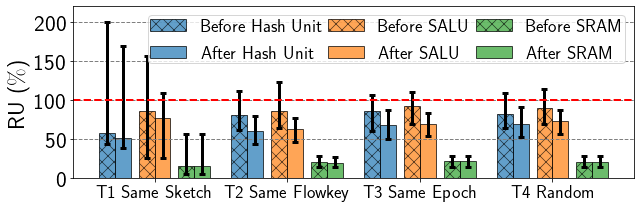

<Figure size 432x288 with 0 Axes>

In [3]:
import numpy as np

def get_reduction_rate(baseline, opt):
    return (baseline - opt)/(baseline+0.000001) * 100

from statistics import median

import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['hatch.linewidth'] = 0.7
matplotlib.rcParams['hatch.color'] = "black"

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
width = 0.1
#     plt.rcParams['xtick.labelbottom'] = False


markerst1 = 's'
markerst2 = 'p'
markerst3 = '^'
markerst4 = '*'
markerst5 = '|'
colors = ['C0', 'C0', 'C1', 'C1', 'C2', 'C2']
run_name = "gd_5_5"
key_list = sorted(data['workload_1']['gd_5_5'].keys())
# key_list = [10]
key_list = [12]
for key in key_list:
#     fig, ax = plt.subplots(figsize=(5, 3))
    xaxis_title = "Number of sketch instances = " + str(key)
    print(run_name)
    result = {}
    min_result = {}
    max_result = {}
    for resource in ["hashcall", "salu", "sram"]:
        result[resource] = {}
        result[resource]["before"] = []
        result[resource]["after"] = []

        min_result[resource] = {}
        min_result[resource]["before"] = []
        min_result[resource]["after"] = []

        max_result[resource] = {}
        max_result[resource]["before"] = []
        max_result[resource]["after"] = []
        
#     fig, ax = plt.subplots(figsize=(10, 5))
    fig, ax = plt.subplots(figsize=(9, 3))

#     workload_list = ["T1", "T2", "T3", "T4", "T5"]
#     workload_list = ["T1. Same\nSketch", "T2. Same\nFlowkey", "T3. Same\nFlowsize", "T4. Random"]
    # workload_list = ["T1 Same Sketch", "T2 Same Flowkey", "T3 Same Flowsize", "T4 Random"]
    workload_list = ["T1 Same Sketch", "T2 Same Flowkey", "T3 Same Epoch", "T4 Random"]
    # workload_list = ["T1 Same Flowkey", "T2 Same Sketch", "T3 Same Epoch", "T4 Random"]



#     xlabel = [0, 1, 2, 3, 4]
    xlabel = np.arange(4)
    
#     for workload in ["workload_1", "workload_2", "workload_3", "workload_4", "workload_5"]:
    for workload in ["workload_1", "workload_2", "workload_4", "workload_5"]:
    # for workload in ["workload_2", "workload_1", "workload_4", "workload_5"]:
        df_list = data[workload][run_name][key]["df_list"]

        df_len = len(df_list)

        for before_after in ['before', 'after']:
            for resource in ["hashcall", "salu", "sram"]:
                data_list = []
                for i in range(0, df_len):
                    data_list.append(df_list[i].loc[resource, before_after])
                sorted_list = sorted(data_list)
                result[resource][before_after].append(sorted_list[int(df_len*0.5)])
                min_result[resource][before_after].append(sorted_list[int(df_len*0.5)] - sorted_list[int(df_len*0.1)])
                max_result[resource][before_after].append(sorted_list[int(df_len*0.9)] - sorted_list[int(df_len*0.5)])


    i = 0

    width = 0.12
    for individual_resource, offset in zip(["hashcall", "salu", "sram"], [-2.5, 0, 2.5]):
        if individual_resource == "hashcall":
            label = "Hash Unit"

        if individual_resource == "salu":
            label = "SALU"

        if individual_resource == "sram":
            label = "SRAM"
        print("before", result[individual_resource]["before"])
        ax.bar(xlabel+(offset-0.5)*width,
               result[individual_resource]["before"],
               width,
               label="Before " + label,
#                hatch='...',
               alpha=0.7,
               hatch='XX',
               color=colors[i],
               edgecolor='black',
               yerr=[min_result[individual_resource]["before"], max_result[individual_resource]["before"]],
               error_kw=dict(lw=3, capsize=3, capthick=3))

        print("after", result[individual_resource]["after"])
        ax.bar(xlabel+(offset+0.5)*width,
               result[individual_resource]["after"],
               width,
               label="After " + label,
#                hatch='+++',
               alpha=0.7,
#                hatch='XX',
               color=colors[i+1],
               edgecolor='black',
               yerr=[min_result[individual_resource]["after"], max_result[individual_resource]["after"]],
               error_kw=dict(lw=3, capsize=3, capthick=3))
        i += 2

    ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
    # fig.canvas.draw()
    # ax.set_title(individual_resource + ' Usage ($\\%$) before vs after', fontsize=30)
    ax.set_xticks(np.arange(len(workload_list)))
    ax.set_xticklabels(workload_list, fontsize=18)
#     ax.set_xlabel(xaxis_title, fontsize=20)
    ax.set_yticks(np.arange(0, 450, step=50))
    ax.tick_params(axis='y', labelsize=23)
    ax.set_ylabel('RU ($\\%$)', fontsize=23)
    ax.set_ylim([0, 220])
    ax.legend(loc="upper right", ncol=3, fontsize=18, columnspacing=0.3, borderpad=0.1)
    ax.axhline(y=100, color='red', linestyle="--", linewidth=2)
    # ax.legend(ncol=2, frameon=True, loc='best', borderaxespad=0.1,
    # handlelength=0.6, handletextpad=0.2, columnspacing=0.3, fontsize=20,
    # framealpha=0.5)
    ax.minorticks_off()
    plt.grid(color='gray', linestyle='--', linewidth=1, axis='y')
    plt.tight_layout()
    latex_path = "/Users/hnamkung/hun-latex/Hun-multi-dim-sketches/nsdi23/figures/6_evaluation"
    # latex_path = "."
    full_path = os.path.join(latex_path, "resource_usage.pdf")
    plt.savefig(full_path, bbox_inches='tight', pad_inches=0.02)
    plt.show()
    plt.clf()
    



gd_5_5
before [80.55555555555554]


ValueError: The lengths of the data (4) and the error 1 do not match

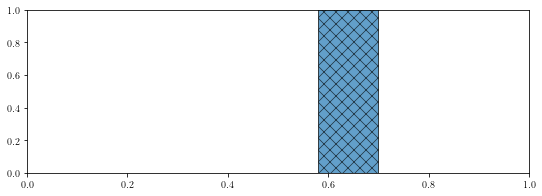

In [3]:
import numpy as np

def get_reduction_rate(baseline, opt):
    return (baseline - opt)/(baseline+0.000001) * 100

from statistics import median

import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['hatch.linewidth'] = 0.7
matplotlib.rcParams['hatch.color'] = "black"

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
width = 0.1
#     plt.rcParams['xtick.labelbottom'] = False


markerst1 = 's'
markerst2 = 'p'
markerst3 = '^'
markerst4 = '*'
markerst5 = '|'
colors = ['C0', 'C0', 'C1', 'C1', 'C2', 'C2']
run_name = "gd_5_5"
key_list = sorted(data['workload_1']['gd_5_5'].keys())
# key_list = [10]
key_list = [12]
for key in key_list:
#     fig, ax = plt.subplots(figsize=(5, 3))
    xaxis_title = "Number of sketch instances = " + str(key)
    print(run_name)
    result = {}
    min_result = {}
    max_result = {}
    for resource in ["hashcall", "salu", "sram"]:
        result[resource] = {}
        result[resource]["before"] = []
        result[resource]["after"] = []

        min_result[resource] = {}
        min_result[resource]["before"] = []
        min_result[resource]["after"] = []

        max_result[resource] = {}
        max_result[resource]["before"] = []
        max_result[resource]["after"] = []
        
#     fig, ax = plt.subplots(figsize=(10, 5))
    fig, ax = plt.subplots(figsize=(9, 3))

#     workload_list = ["T1", "T2", "T3", "T4", "T5"]
#     workload_list = ["T1. Same\nSketch", "T2. Same\nFlowkey", "T3. Same\nFlowsize", "T4. Random"]
    # workload_list = ["T1 Same Sketch", "T2 Same Flowkey", "T3 Same Flowsize", "T4 Random"]
    # workload_list = ["T1 Same Sketch", "T2 Same Flowkey", "T3 Same Epoch", "T4 Random"]
    workload_list = ["T1 Same Sketch", "T2 Same Flowkey", "T3 Same Epoch", "T4 Random"]
    # workload_list = ["T1 Same Flowkey", "T2 Same Sketch", "T3 Same Epoch", "T4 Random"]



#     xlabel = [0, 1, 2, 3, 4]
    xlabel = np.arange(4)
    
#     for workload in ["workload_1", "workload_2", "workload_3", "workload_4", "workload_5"]:
    for workload in ["workload_1", "workload_2", "workload_4", "workload_5"]:
    # for workload in ["workload_2", "workload_1", "workload_4", "workload_5"]:
        df_list = data[workload][run_name][key]["df_list"]

        df_len = len(df_list)

        for before_after in ['before', 'after']:
            for resource in ["hashcall", "salu", "sram"]:
                data_list = []
                for i in range(0, df_len):
                    data_list.append(df_list[i].loc[resource, before_after])
                sorted_list = sorted(data_list)
                result[resource][before_after].append(sorted_list[int(df_len*0.5)])
                min_result[resource][before_after].append(sorted_list[int(df_len*0.5)] - sorted_list[int(df_len*0.1)])
                max_result[resource][before_after].append(sorted_list[int(df_len*0.9)] - sorted_list[int(df_len*0.5)])


    i = 0

    width = 0.12
    for individual_resource, offset in zip(["hashcall", "salu", "sram"], [-2.5, 0, 2.5]):
        if individual_resource == "hashcall":
            label = "Hash Unit"

        if individual_resource == "salu":
            label = "SALU"

        if individual_resource == "sram":
            label = "SRAM"
        print("before", result[individual_resource]["before"])
        ax.bar(xlabel+(offset-0.5)*width,
               result[individual_resource]["before"],
               width,
               label="Before " + label,
#                hatch='...',
               alpha=0.7,
               hatch='XX',
               color=colors[i],
               edgecolor='black',
               yerr=[min_result[individual_resource]["before"], max_result[individual_resource]["before"]],
               error_kw=dict(lw=3, capsize=3, capthick=3))

        print("after", result[individual_resource]["after"])
        ax.bar(xlabel+(offset+0.5)*width,
               result[individual_resource]["after"],
               width,
               label="After " + label,
#                hatch='+++',
               alpha=0.7,
#                hatch='XX',
               color=colors[i+1],
               edgecolor='black',
               yerr=[min_result[individual_resource]["after"], max_result[individual_resource]["after"]],
               error_kw=dict(lw=3, capsize=3, capthick=3))
        i += 2

    ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
    # fig.canvas.draw()
    # ax.set_title(individual_resource + ' Usage ($\\%$) before vs after', fontsize=30)
    ax.set_xticks(np.arange(len(workload_list)))
    ax.set_xticklabels(workload_list, fontsize=18)
#     ax.set_xlabel(xaxis_title, fontsize=20)
    ax.set_yticks(np.arange(0, 450, step=50))
    ax.tick_params(axis='y', labelsize=23)
    ax.set_ylabel('RU ($\\%$)', fontsize=23)
    ax.set_ylim([0, 220])
    ax.legend(loc="upper right", ncol=3, fontsize=18, columnspacing=0.3, borderpad=0.1)
    ax.axhline(y=100, color='red', linestyle="--", linewidth=2)
    # ax.legend(ncol=2, frameon=True, loc='best', borderaxespad=0.1,
    # handlelength=0.6, handletextpad=0.2, columnspacing=0.3, fontsize=20,
    # framealpha=0.5)
    ax.minorticks_off()
    plt.grid(color='gray', linestyle='--', linewidth=1, axis='y')
    plt.tight_layout()
    # latex_path = "/Users/hnamkung/hun-latex/Hun-multi-dim-sketches/nsdi23/figures/6_evaluation"
    latex_path = "."
    full_path = os.path.join(latex_path, "resource_usage_ppt.pdf")
    plt.savefig(full_path, bbox_inches='tight', pad_inches=0.02)
    plt.show()
    plt.clf()
    



In [23]:
def get_reduction_rate(baseline, opt):
    return (baseline - opt)/(baseline+0.000001) * 100

from statistics import median

import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['hatch.linewidth'] = 0.1
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
width = 0.1

markerst1 = 's'
markerst2 = 'p'
markerst3 = '^'
markerst4 = '*'
markerst5 = '|'


for run_name in ["gd_5_5"]:
# for run_name in ["gd_0_0"]:
    print(run_name)
    for workload in ["workload_1", "workload_2", "workload_4", "workload_5"]:
        key_list = sorted(data[workload][run_name].keys())
#         print(workload)
        for resource in ["hashcall", "salu", "sram"]:
#             print(resource)
            plot_data = {}
            for opt in ["Total", "hash_reuse", "hash_xor", "salu_reuse", "salu_merge", "hfs_reuse"]:
                plot_data[opt] = []
            key_list = [12]
            for key in key_list:
                df = data[workload][run_name][key]["mean_df"]
                total = 0
                for opt in ["hash_reuse", "hash_xor", "salu_reuse", "salu_merge", "hfs_reuse"]:
                    series = df[opt]/df["before"]*100
#                     if resource == "sram":
#                         plot_data[opt].append(-series[resource])
#                     else:
#                         plot_data[opt].append(series[resource])
                    plot_data[opt].append(series[resource])

                    
                    total += series[resource]
#                 if resource == "sram":
#                     plot_data["Total"].append(-total)
#                 else:
#                     plot_data["Total"].append(total)
                plot_data["Total"].append(total)
                for opt in ["Total", "hash_reuse", "hash_xor", "salu_reuse", "salu_merge", "hfs_reuse"]:
                    make_str = "%.1f" % plot_data[opt][0]
                    if plot_data[opt][0] == 0:
                        print("%7s & " % " ", end="")
                    else:
                        print("%7s & " % make_str, end="")
#                     print(resource, opt, "%.1f" % plot_data[opt][0], end="")

                print()





gd_5_5
 21.261 &   3.051 &   0.092 &         &         &  18.117 & 
 25.664 &         &         &         &   0.803 &  24.861 & 
 -0.026 &         &         &         &  -0.026 &  -0.000 & 
 27.565 &  10.412 &         &         &         &  17.154 & 
 33.143 &         &         &   3.845 &   5.878 &  23.420 & 
  1.810 &         &         &   2.347 &  -0.538 &  -0.000 & 
 18.945 &   5.486 &   0.044 &         &         &  13.416 & 
 24.701 &         &         &   2.182 &   3.705 &  18.815 & 
  0.948 &         &         &   1.301 &  -0.352 &  -0.000 & 
 15.486 &   1.856 &   0.044 &         &         &  13.586 & 
 20.383 &         &         &   0.552 &   0.974 &  18.858 & 
  0.221 &         &         &   0.316 &  -0.095 &  -0.000 & 


gd_5_5


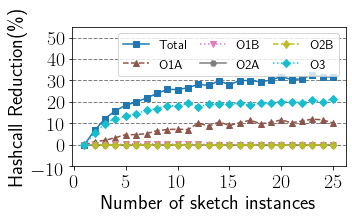

<Figure size 432x288 with 0 Axes>

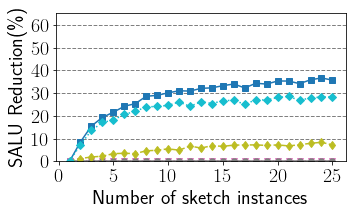

<Figure size 432x288 with 0 Axes>

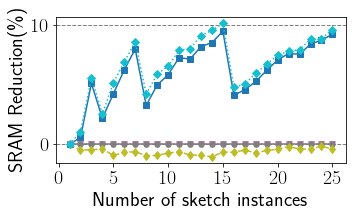

<Figure size 432x288 with 0 Axes>

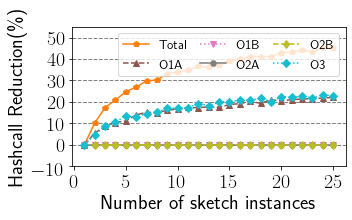

<Figure size 432x288 with 0 Axes>

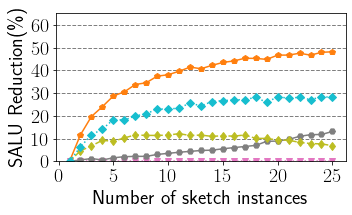

<Figure size 432x288 with 0 Axes>

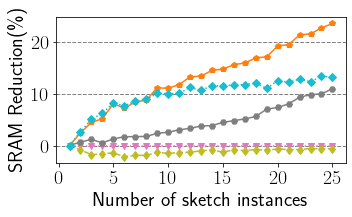

<Figure size 432x288 with 0 Axes>

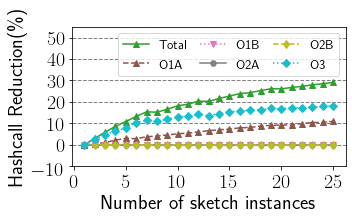

<Figure size 432x288 with 0 Axes>

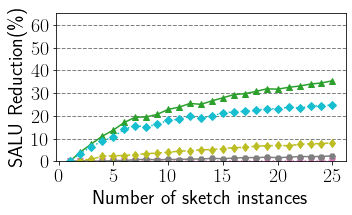

<Figure size 432x288 with 0 Axes>

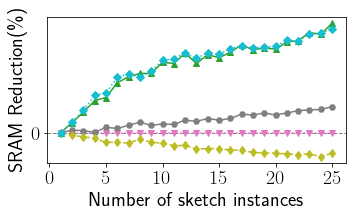

<Figure size 432x288 with 0 Axes>

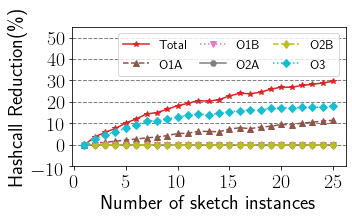

<Figure size 432x288 with 0 Axes>

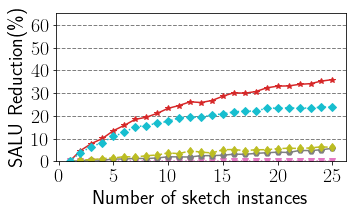

<Figure size 432x288 with 0 Axes>

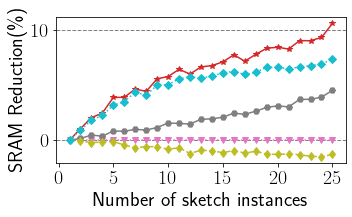

<Figure size 432x288 with 0 Axes>

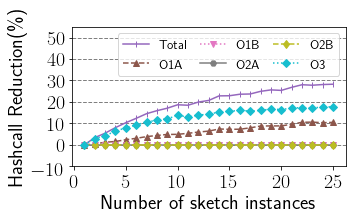

<Figure size 432x288 with 0 Axes>

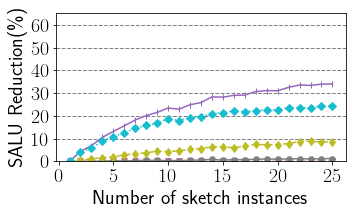

<Figure size 432x288 with 0 Axes>

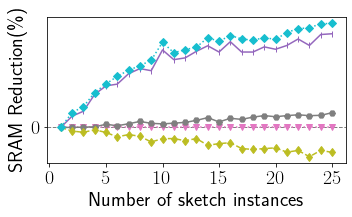

<Figure size 432x288 with 0 Axes>

In [142]:
def get_reduction_rate(baseline, opt):
    return (baseline - opt)/(baseline+0.000001) * 100

from statistics import median

import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['hatch.linewidth'] = 0.1
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
width = 0.1

markerst1 = 's'
markerst2 = 'p'
markerst3 = '^'
markerst4 = '*'
markerst5 = '|'


for run_name in ["gd_5_5"]:
# for run_name in ["gd_0_0"]:
    print(run_name)
    for workload in ["workload_1", "workload_2", "workload_3", "workload_4", "workload_5"]:
        key_list = sorted(data[workload][run_name].keys())
        for resource in ["hashcall", "salu", "sram"]:
            fig, ax = plt.subplots(figsize=(5, 3))
            plot_data = {}
            for opt in ["Total", "hash_reuse", "hash_xor", "salu_reuse", "salu_merge", "hfs_reuse"]:
                plot_data[opt] = []

            for key in key_list:
                df = data[workload][run_name][key]["mean_df"]
                total = 0
                for opt in ["hash_reuse", "hash_xor", "salu_reuse", "salu_merge", "hfs_reuse"]:
                    series = df[opt]/df["before"]*100
#                     if resource == "sram":
#                         plot_data[opt].append(-series[resource])
#                     else:
#                         plot_data[opt].append(series[resource])
                    plot_data[opt].append(series[resource])

                    
                    total += series[resource]
#                 if resource == "sram":
#                     plot_data["Total"].append(-total)
#                 else:
#                     plot_data["Total"].append(total)
                plot_data["Total"].append(total)


            if workload == "workload_1":
                workload_name = "W1"
            if workload == "workload_2":
                workload_name = "W2"
            if workload == "workload_3":
                workload_name = "W3"
            if workload == "workload_4":
                workload_name = "W4"
            if workload == "workload_5":
                workload_name = "W5"
            
#             for opt in ["Total", "O1", "O2", "O3", "O4", "O5"]:
            for opt in ["Total", "hash_reuse", "hash_xor", "salu_reuse", "salu_merge", "hfs_reuse"]:
                linestyle = "-"
                if opt == "Total":
                    if workload == "workload_1":
                        color="C0"
                        marker = markerst1
                        label = "W1 total"
                    if workload == "workload_2":
                        color="C1"
                        marker = markerst2
                        label = "W2 total"
                    if workload == "workload_3":
                        color="C2"
                        marker = markerst3
                        label = "W3 total"
                    if workload == "workload_4":
                        color="C3"
                        marker = markerst4
                        label = "W4 total"
                    if workload == "workload_5":
                        color="C4"
                        marker = markerst5
                        label = "W5 total"
                    label = "Total"
                if opt == "hash_reuse":
                    color = "black"
                    color = "C5"
                    marker = markerst1
                    marker = "^"
                    linestyle = "--"
                    label = "O1A"

                if opt == "hash_xor":
                    color = "black"
                    color = "C6"
                    marker = markerst1
                    marker = "v"
                    linestyle = ":"
                    label = "O1B"

                if opt == "salu_reuse":
                    color = "black"
                    color = "C7"
                    marker = markerst1
                    marker = "H"
                    linestyle = "-"
                    label = "O2A"

                if opt == "salu_merge":
                    color = "black"
                    color = "C8"
                    marker = markerst1
                    marker = "d"
                    linestyle = "--"
                    label = "O2B"

                if opt == "hfs_reuse":
                    color = "black"
                    color = "C9"
                    marker = markerst1
                    marker = "D"
                    linestyle = ":"
                    label = "O3"

                if resource == "salu" and opt == "hash_reuse":
                    pass
                elif resource == "sram" and opt == "hash_reuse":
                    pass
                else:
                    ax.plot(key_list, plot_data[opt], label=label, color=color, marker=marker, linestyle=linestyle)

            ax.tick_params(axis='y', labelsize=20)
        #     ax.set_xticks(key_list)
        #     ax.set_xticklabels([10, 20, 30], fontsize=20)
        #     ax.set_xticklabels(fontsize=20)
        #     ax.xaxis.label.set_size(20)
#             plt.xlabel('xlabel', fontsize=18)
            ax.set_xlabel('Number of sketch instances', fontsize=20)
            plt.xticks(fontsize=20)
            if resource == "hashcall":
                ax.set_ylim([-10, 55])
                ax.set_ylabel(f"Hashcall Reduction(\\%)", fontsize=20)
#                 filename = "hashcall_reduction.pdf"
#         #         plt.legend(loc="lower right", fontsize=13, ncol=3, columnspacing=1)
                plt.legend(loc="upper right", fontsize=13, ncol=3, columnspacing=1)

            if resource == "salu":
                ax.set_ylim([0, 65])
                ax.set_ylabel(f"SALU Reduction(\\%)", fontsize=20)
#                 filename = "salu_reduction.pdf"
#                 plt.legend(loc="lower right", fontsize=13, ncol=3, columnspacing=1)

            if resource == "sram":
#                 ax.set_ylim([0, 60])
                ax.set_ylabel(f"SRAM Reduction(\\%)", fontsize=20)
#                 filename = "sram_overhead.pdf"

            from matplotlib.ticker import MultipleLocator
            ax.yaxis.set_major_locator(MultipleLocator(10))

            plt.grid(color='gray', linestyle='--', linewidth=1, axis='y')
            fig.tight_layout()
            filename = f"{workload_name}_{resource}.pdf"
#             plt.savefig(filename)
            plt.show()
            plt.clf()


